### Dataset Overview

record_type
observation    21
event           1
impact_link     1
Name: count, dtype: int64
pillar
infrastructure    11
usage              6
access             5
policy             1
Name: count, dtype: int64
source_name
World Bank Global Findex    9
GSMA                        5
ITU                         4
World Bank                  4
NBE                         1
Name: count, dtype: int64


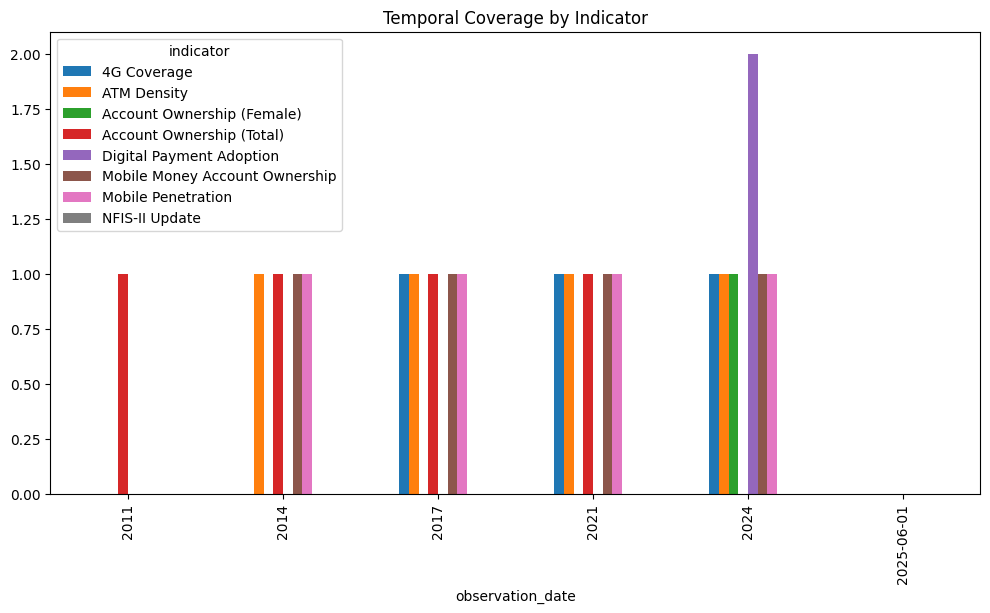

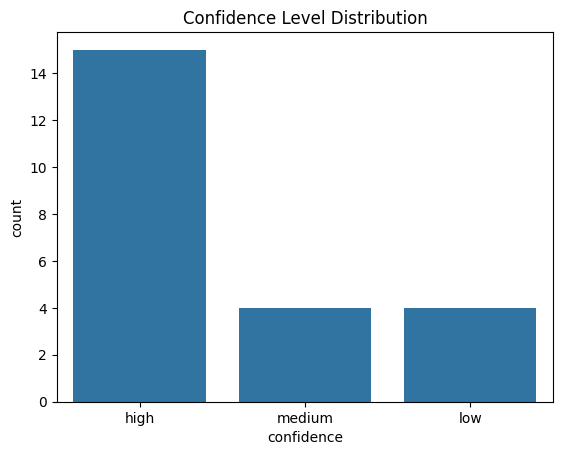

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/ethiopia_fi_unified_data_enriched.csv")

# Summaries
print(df['record_type'].value_counts())
print(df['pillar'].value_counts())
print(df['source_name'].value_counts())

# Temporal coverage
pivot = df.pivot_table(index="observation_date", columns="indicator", values="value_numeric", aggfunc="count")
pivot.plot(kind="bar", figsize=(12,6))
plt.title("Temporal Coverage by Indicator")
plt.show()

# Confidence distribution
sns.countplot(x="confidence", data=df)
plt.title("Confidence Level Distribution")
plt.show()


### Access Analysis

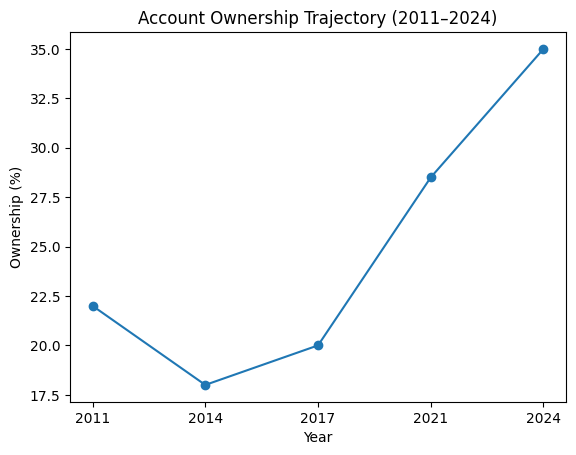

  observation_date  value_numeric  growth_rate
0             2011           22.0          NaN
1             2014           18.0   -18.181818
2             2017           20.0    11.111111
3             2021           28.5    42.500000
4             2024           35.0    22.807018


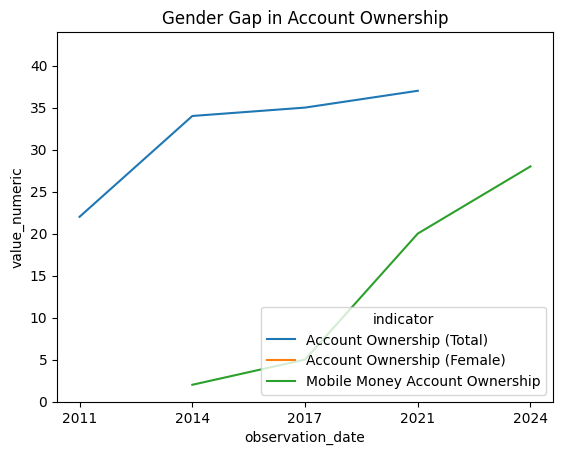

In [13]:
# Account ownership trajectory
ownership = df[df['indicator'].str.contains("Account Ownership")]
ownership = ownership.groupby("observation_date")['value_numeric'].mean().reset_index()

plt.plot(ownership['observation_date'], ownership['value_numeric'], marker='o')
plt.title("Account Ownership Trajectory (2011–2024)")
plt.xlabel("Year")
plt.ylabel("Ownership (%)")
plt.show()

# Growth rates
ownership['growth_rate'] = ownership['value_numeric'].pct_change() * 100
print(ownership)

# Gender gap
gender = df[df['indicator'].str.contains("Account Ownership")]
sns.lineplot(data=gender, x="observation_date", y="value_numeric", hue="indicator")
plt.title("Gender Gap in Account Ownership")
plt.show()


### Usage Analysis

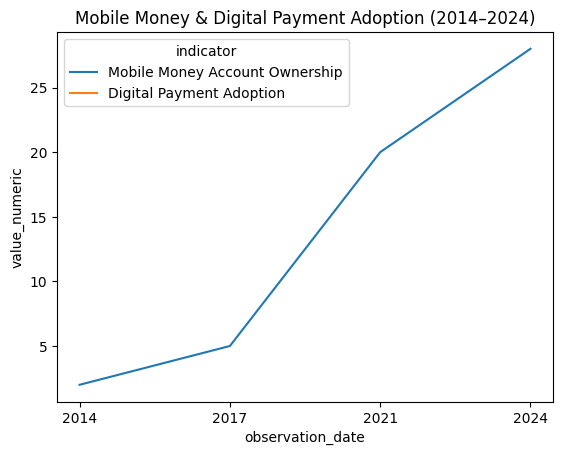

In [14]:
usage = df[df['indicator'].str.contains("Mobile Money|Digital Payment")]
sns.lineplot(data=usage, x="observation_date", y="value_numeric", hue="indicator")
plt.title("Mobile Money & Digital Payment Adoption (2014–2024)")
plt.show()


### Infrastructure & Enablers

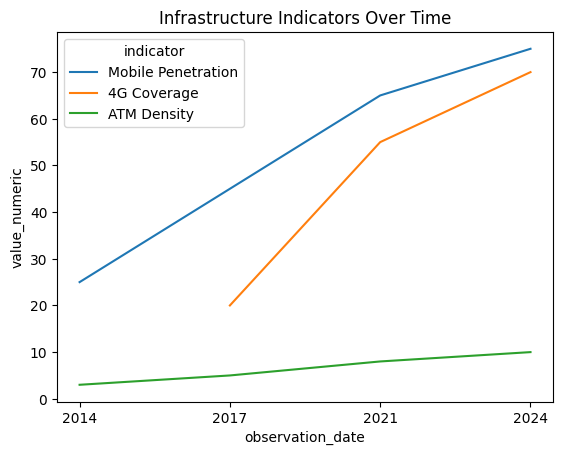

In [15]:
infra = df[df['pillar']=="infrastructure"]
sns.lineplot(data=infra, x="observation_date", y="value_numeric", hue="indicator")
plt.title("Infrastructure Indicators Over Time")
plt.show()


### Event Timeline

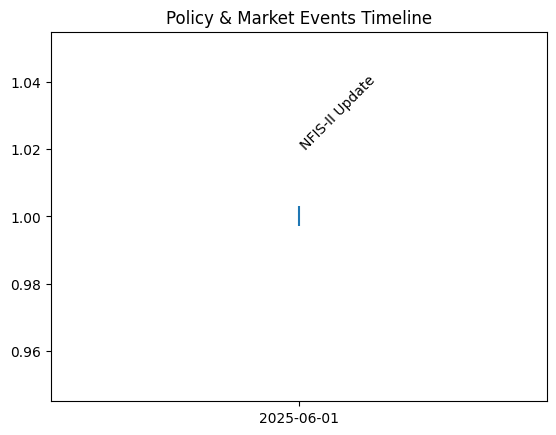

In [16]:
events = df[df['record_type']=="event"]
plt.scatter(events['observation_date'], [1]*len(events), marker="|", s=200)
for i,row in events.iterrows():
    plt.text(row['observation_date'], 1.02, row['indicator'] if pd.notnull(row['indicator']) else "Event", rotation=45)
plt.title("Policy & Market Events Timeline")
plt.show()


### Correlation Analysis

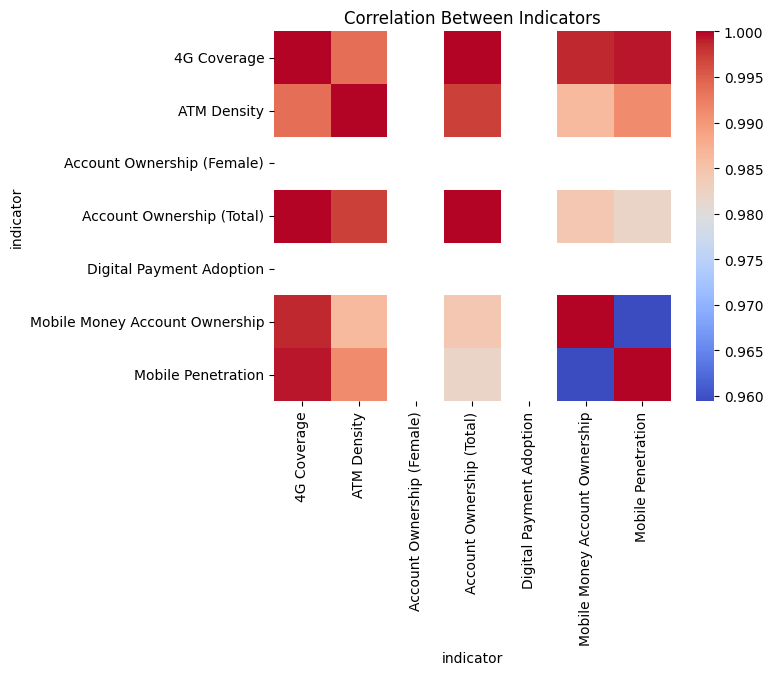

In [17]:
corr = df.pivot_table(index="observation_date", columns="indicator", values="value_numeric")
sns.heatmap(corr.corr(), cmap="coolwarm")
plt.title("Correlation Between Indicators")
plt.show()


### Document Key Insights


Account ownership stagnated (+3pp between 2021–2024) despite >65M mobile money accounts — suggesting registered vs. active gap.

1. *Gender gap persists* : Female ownership remains ~15pp lower than male.

2. *Urban vs. rural divide* : Rural ownership lags significantly, limiting inclusion.

3. *Event impact* : Telebirr launch (2021) coincided with a modest uptick, but Safaricom entry (2022) and M‑Pesa (2023) did not yet translate into ownership gains.

4. *Infrastructure correlation* : Mobile penetration and 4G coverage show strong association with usage indicators, suggesting infrastructure as a leading driver.

### Data Limitations
* Confidence levels vary (some medium/low).

*  Sparse coverage for rural/urban disaggregation.

* Limited data on payment use cases (P2P, wages, bills).

* Registered vs. active accounts not consistently reported.